# Melanoma Detection Project

## Downloading the data

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download wanderdust/skin-lesion-analysis-toward-melanoma-detection
! unzip skin-lesion-analysis-toward-melanoma-detection.zip

100% 11.3G/11.3G [02:42<00:00, 99.1MB/s]
100% 11.3G/11.3G [02:42<00:00, 74.5MB/s]
Archive:  skin-lesion-analysis-toward-melanoma-detection.zip
  inflating: skin-lesions/test/melanoma/ISIC_0012258.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012356.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012369.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012395.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012425.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012758.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0012989.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013072.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013073.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013242.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013277.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013321.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013374.jpg  
  inflating: skin-lesions/test/melanoma/ISIC_0013411.jpg  
  inflating: skin-lesions/test/

Deleting third class - seborrheic_keratosis

In [ ]:
import shutil

dir_path_train="skin-lesions/train/seborrheic_keratosis"
dir_path_test="skin-lesions/test/seborrheic_keratosis"
dir_path_valid="skin-lesions/valid/seborrheic_keratosis"

shutil.rmtree(dir_path_train)
shutil.rmtree(dir_path_test)
shutil.rmtree(dir_path_valid)

In [ ]:
train_dir = 'skin-lesions/train/'
test_dir = 'skin-lesions/test/'
valid_dir = 'skin-lesions/valid/'

## Preparing the data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_rows = 50
img_cols = 50

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_rows, img_cols),
    batch_size=20,
    class_mode='binary')

Found 1746 images belonging to 2 classes.
Found 510 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 50, 50, 3)
labels batch shape: (20,)


## Drawing plots function

In [ ]:
import matplotlib.pyplot as plt  # library for plotting math functions: https://matplotlib.org/stable/index.html
    
def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.ylim(0,1)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   # clear figure
    #plt.rcParams['figure.figsize'] = (25.0, 5.0) # set default size of plots
    plt.figure(figsize=(25,5))
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    #plt.ylim(0,1)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import keras

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers

TensorFlow version: 2.8.2
Keras version: 2.8.0


## Model 1
Creating simpler model with just two dense layers and 64 neurons in them.

Also Previously we reshaped our images to 150x150 which gave us millions of parameters after Flatten() layer *which* for such a small data set is bad.

Because of that we decided to resize our images to smaller size (50x50).

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 5184)             

In [ ]:
model1.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history1 = model1.fit_generator(train_generator,
                        epochs=10,
                        steps_per_epoch=60,
                        validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
60/60 [==============================] - 350s 6s/step - loss: 0.5513 - acc: 0.7791 - val_loss: 0.5342 - val_acc: 0.7706
Epoch 2/10
60/60 [==============================] - 339s 6s/step - loss: 0.5307 - acc: 0.7825 - val_loss: 0.5349 - val_acc: 0.7706
Epoch 3/10
60/60 [==============================] - 341s 6s/step - loss: 0.5311 - acc: 0.7841 - val_loss: 0.5345 - val_acc: 0.7706
Epoch 4/10
60/60 [==============================] - 349s 6s/step - loss: 0.5171 - acc: 0.7901 - val_loss: 0.5444 - val_acc: 0.7627
Epoch 5/10
60/60 [==============================] - 339s 6s/step - loss: 0.5140 - acc: 0.7732 - val_loss: 0.5395 - val_acc: 0.7725
Epoch 6/10
60/60 [==============================] - 342s 6s/step - loss: 0.4983 - acc: 0.7909 - val_loss: 0.5316 - val_acc: 0.7588
Epoch 7/10
60/60 [==============================] - 344s 6s/step - loss: 0.5078 - acc: 0.7841 - val_loss: 0.5477 - val_acc: 0.7627
Epoch 8/10
60/60 [==============================] - 339s 6s/step - loss: 0.4806 - a

<Figure size 432x288 with 0 Axes>

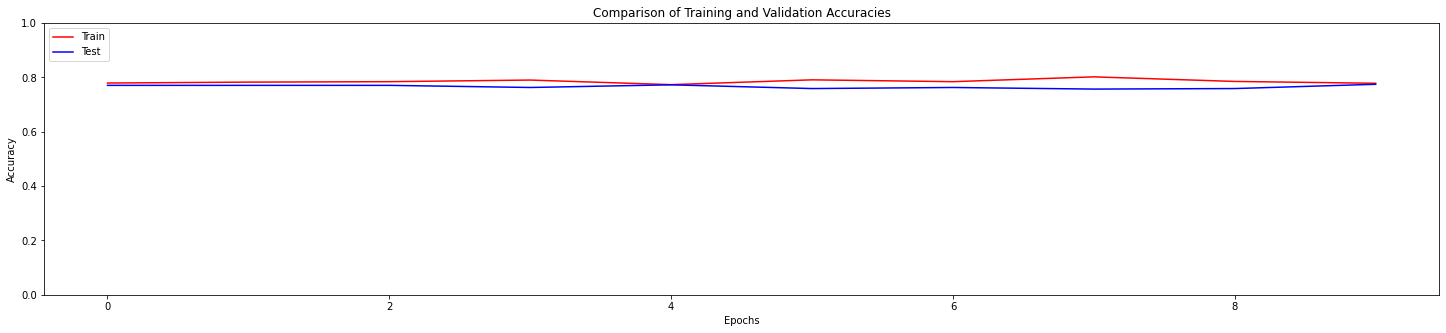

<Figure size 432x288 with 0 Axes>

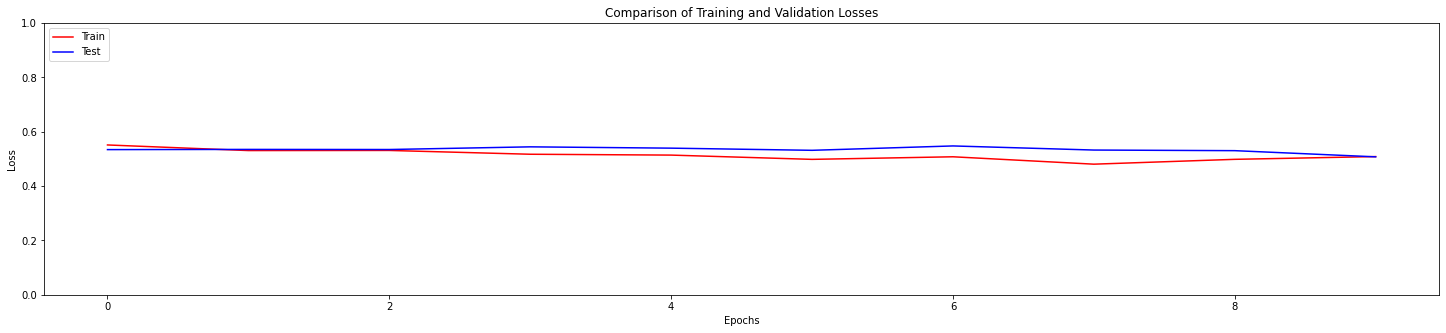

In [ ]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

I think it doesn't work

## Model 2

Decreasing number of neurons in Dense layer to 16

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model2.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0

In [ ]:
model2.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history2 = model2.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=60,
                        validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
60/60 [==============================] - 429s 7s/step - loss: 0.5397 - acc: 0.7767 - val_loss: 0.5355 - val_acc: 0.7706
Epoch 2/10
60/60 [==============================] - 417s 7s/step - loss: 0.5491 - acc: 0.7775 - val_loss: 0.5342 - val_acc: 0.7706
Epoch 3/10
60/60 [==============================] - 407s 7s/step - loss: 0.5258 - acc: 0.7867 - val_loss: 0.6587 - val_acc: 0.7706
Epoch 4/10
60/60 [==============================] - 400s 7s/step - loss: 0.5276 - acc: 0.7799 - val_loss: 0.5457 - val_acc: 0.7706
Epoch 5/10
60/60 [==============================] - 401s 7s/step - loss: 0.5050 - acc: 0.7850 - val_loss: 0.5384 - val_acc: 0.7706
Epoch 6/10
60/60 [==============================] - 389s 7s/step - loss: 0.5075 - acc: 0.7858 - val_loss: 0.5550 - val_acc: 0.7706
Epoch 7/10
60/60 [==============================] - 399s 7s/step - loss: 0.4991 - acc: 0.7850 - val_loss: 0.5560 - val_acc: 0.7706
Epoch 8/10
60/60 [==============================] - 396s 7s/step - loss: 0.5186 - a

**Missclick**

<Figure size 432x288 with 0 Axes>

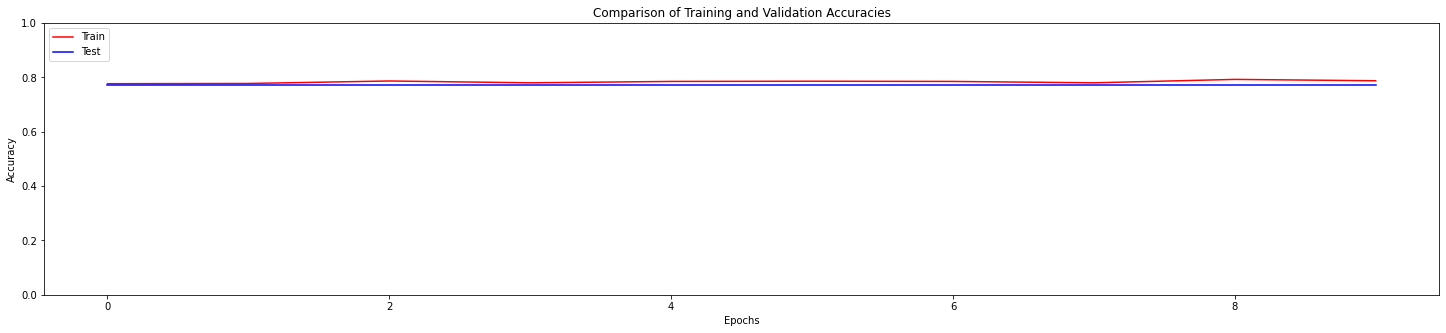

<Figure size 432x288 with 0 Axes>

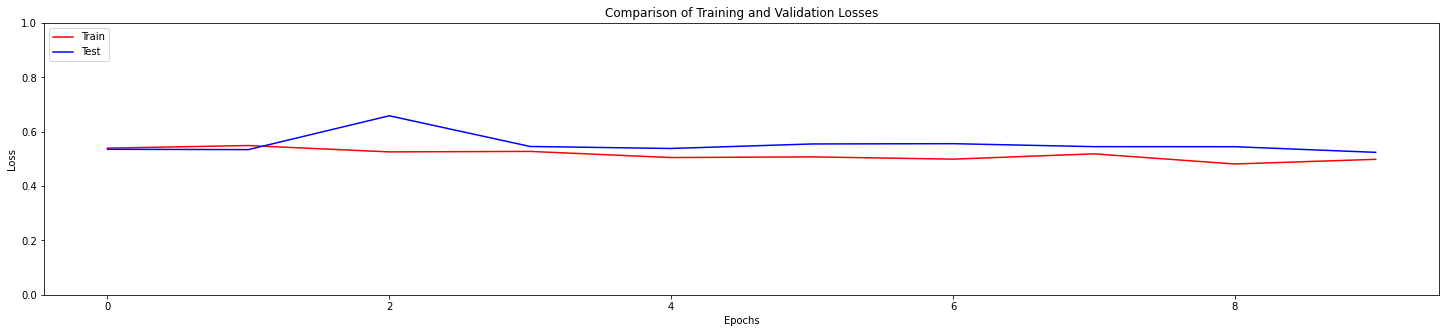

In [ ]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')

PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

## Model 3

Simplyfing convolutional layers, removing one conv layer

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))

model3.add(layers.Flatten())

model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 16)                247824    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                        

In [ ]:
model3.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history3 = model3.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=60,
                        validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
60/60 [==============================] - 407s 7s/step - loss: 0.6608 - acc: 0.7782 - val_loss: 0.5558 - val_acc: 0.7706
Epoch 2/10
60/60 [==============================] - 400s 7s/step - loss: 0.5337 - acc: 0.7833 - val_loss: 0.5291 - val_acc: 0.7706
Epoch 3/10
60/60 [==============================] - 391s 7s/step - loss: 0.5366 - acc: 0.7808 - val_loss: 0.5269 - val_acc: 0.7608
Epoch 4/10
60/60 [==============================] - 389s 7s/step - loss: 0.4935 - acc: 0.7850 - val_loss: 0.5354 - val_acc: 0.7706
Epoch 5/10
60/60 [==============================] - 382s 6s/step - loss: 0.4716 - acc: 0.8069 - val_loss: 0.5300 - val_acc: 0.7706
Epoch 6/10
60/60 [==============================] - 385s 6s/step - loss: 0.4981 - acc: 0.7841 - val_loss: 0.5170 - val_acc: 0.7706
Epoch 7/10
60/60 [==============================] - 392s 7s/step - loss: 0.4778 - acc: 0.7909 - val_loss: 0.5173 - val_acc: 0.7706
Epoch 8/10
60/60 [==============================] - 382s 6s/step - loss: 0.4704 - a

<Figure size 432x288 with 0 Axes>

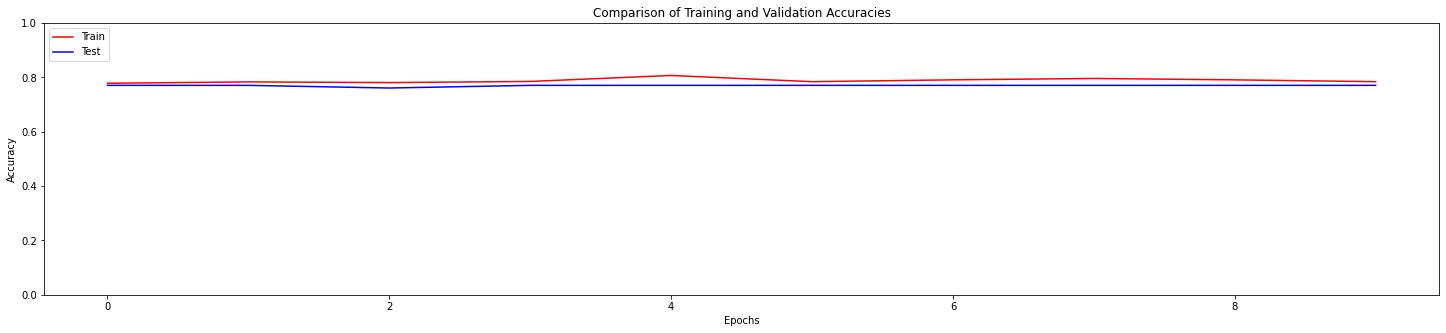

<Figure size 432x288 with 0 Axes>

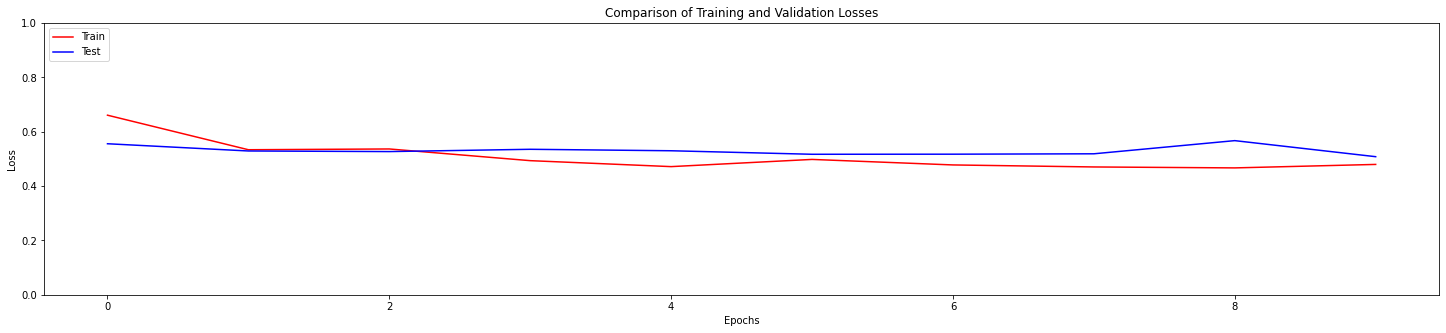

In [ ]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')

PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

## Model 4

Adding two more dense layers with regularizers l2

In [ ]:
from keras import regularizers

model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))

model4.add(layers.Flatten())

model4.add(layers.Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 26912)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1722432   
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
model4.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history4 = model4.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=60,
                        validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
60/60 [==============================] - 388s 7s/step - loss: 0.6189 - acc: 0.7723 - val_loss: 0.6275 - val_acc: 0.7706
Epoch 2/10
60/60 [==============================] - 380s 6s/step - loss: 0.5728 - acc: 0.7563 - val_loss: 0.5688 - val_acc: 0.7706
Epoch 3/10
60/60 [==============================] - 385s 6s/step - loss: 0.5498 - acc: 0.7799 - val_loss: 0.5499 - val_acc: 0.7706
Epoch 4/10
60/60 [==============================] - 384s 6s/step - loss: 0.5370 - acc: 0.7800 - val_loss: 0.5699 - val_acc: 0.7706
Epoch 5/10
60/60 [==============================] - 384s 6s/step - loss: 0.5283 - acc: 0.7833 - val_loss: 0.5390 - val_acc: 0.7706
Epoch 6/10
60/60 [==============================] - 380s 6s/step - loss: 0.5348 - acc: 0.7740 - val_loss: 0.7626 - val_acc: 0.7706
Epoch 7/10
60/60 [==============================] - 378s 6s/step - loss: 0.5164 - acc: 0.7901 - val_loss: 0.5476 - val_acc: 0.7706
Epoch 8/10
60/60 [==============================] - 383s 6s/step - loss: 0.5180 - a

<Figure size 432x288 with 0 Axes>

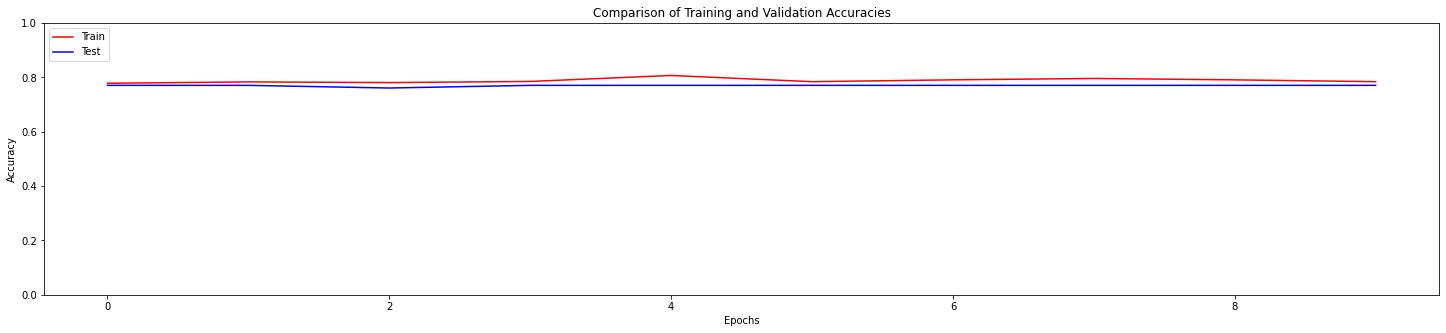

<Figure size 432x288 with 0 Axes>

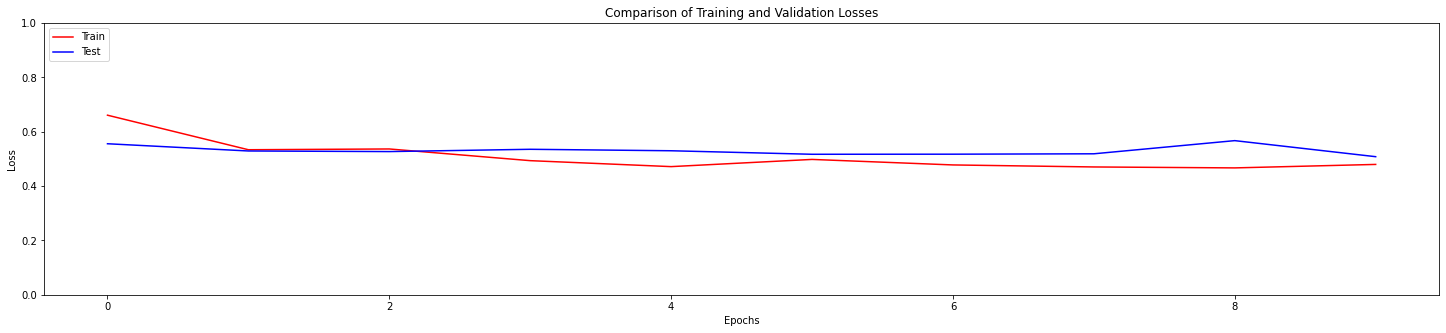

In [ ]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')

PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

## Model 4 -  Changing batch size


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

img_rows = 64
img_cols = 64

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=128,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_rows, img_cols),
    batch_size=128,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_rows, img_cols),
    batch_size=128,
    class_mode='binary')

Found 1746 images belonging to 2 classes.
Found 510 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [ ]:
model4.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

history5 = model4.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=13,
                        validation_data=test_generator,
                        validation_steps = 3)

NameError: ignored

missclick

<Figure size 432x288 with 0 Axes>

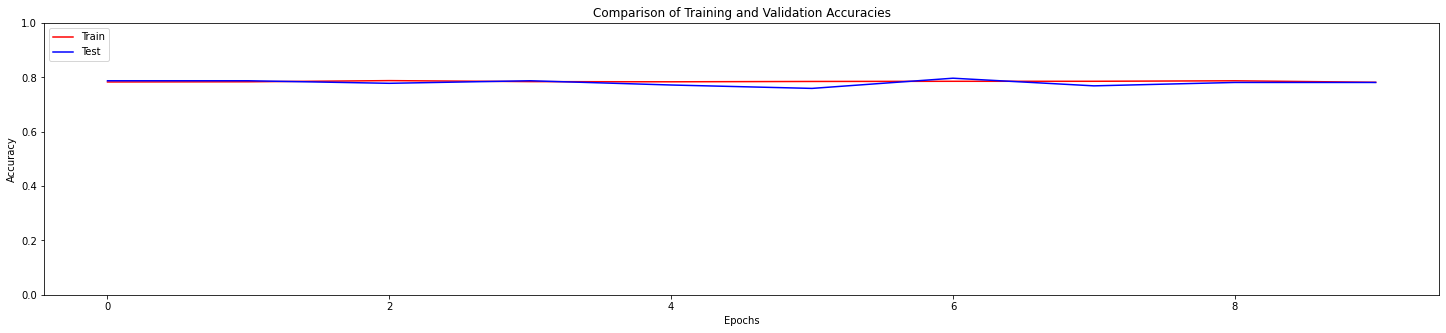

<Figure size 432x288 with 0 Axes>

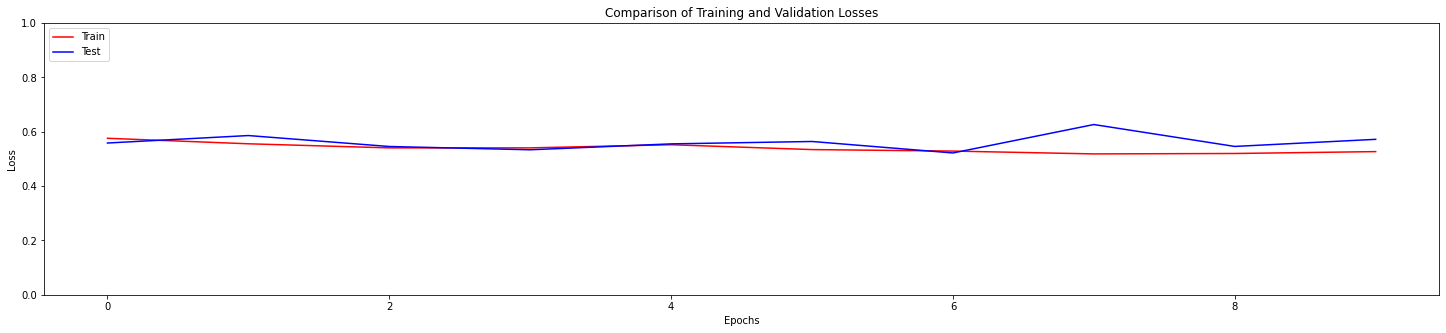

In [ ]:
acc5 = history5.history['acc']
val_acc5 = history5.history['val_acc']
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

PlotAccuracyComparison(acc5, val_acc5, lab = 'Model 4 - batch 64')

PlotLossComparison(loss5, val_loss5, lab = 'Model 4 - batch 64')

## Model 4 - Changing optimizer and learning rate

From RSMprop to Adam 

In [ ]:
from keras import regularizers

model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))

model4.add(layers.Flatten())

model4.add(layers.Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten_3 (Flatten)         (None, 26912)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1722432   
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                      

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history6 = model4.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=13,
                        validation_data=test_generator,
                        validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
13/13 [==============================] - 541s 43s/step - loss: 0.6942 - acc: 0.7336 - val_loss: 0.6151 - val_acc: 0.7812
Epoch 2/10
13/13 [==============================] - 482s 39s/step - loss: 0.6087 - acc: 0.7855 - val_loss: 0.6418 - val_acc: 0.7682
Epoch 3/10
13/13 [==============================] - 482s 38s/step - loss: 0.5984 - acc: 0.7855 - val_loss: 0.6102 - val_acc: 0.7760
Epoch 4/10
13/13 [==============================] - 489s 39s/step - loss: 0.5776 - acc: 0.7899 - val_loss: 0.6157 - val_acc: 0.7578
Epoch 5/10
13/13 [==============================] - 487s 39s/step - loss: 0.5710 - acc: 0.7818 - val_loss: 0.6018 - val_acc: 0.7708
Epoch 6/10
13/13 [==============================] - 486s 39s/step - loss: 0.5580 - acc: 0.7843 - val_loss: 0.5870 - val_acc: 0.7760
Epoch 7/10
13/13 [==============================] - 479s 39s/step - loss: 0.5472 - acc: 0.7849 - val_loss: 0.5938 - val_acc: 0.7734
Epoch 8/10
13/13 [==============================] - 477s 38s/step - loss: 0.

<Figure size 432x288 with 0 Axes>

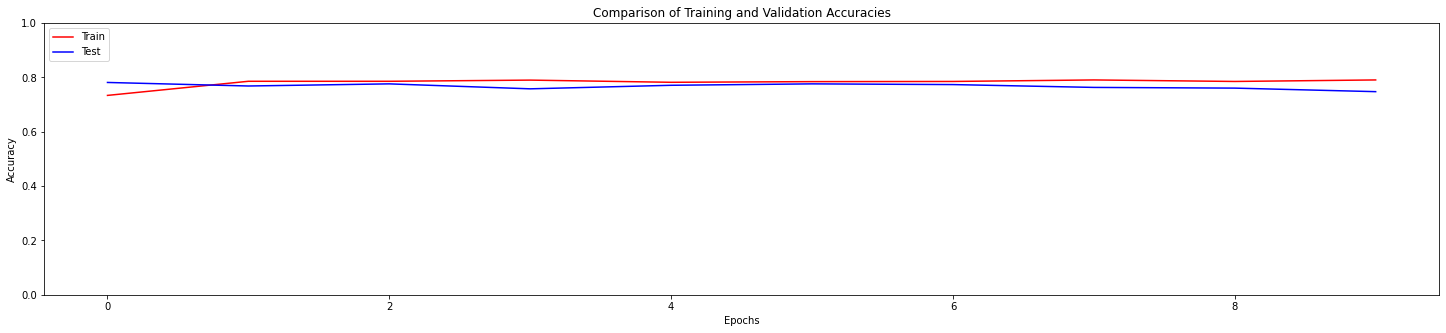

<Figure size 432x288 with 0 Axes>

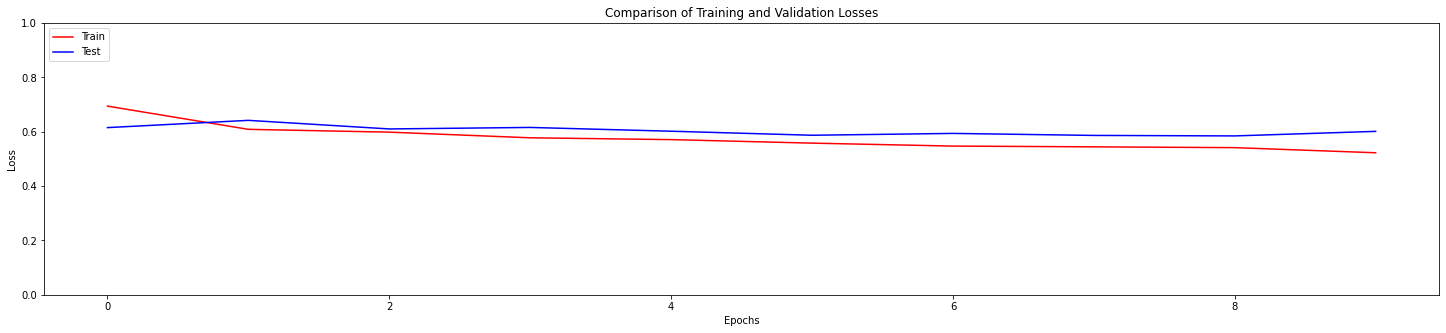

In [ ]:
acc6 = history6.history['acc']
val_acc6 = history6.history['val_acc']
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']

PlotAccuracyComparison(acc6, val_acc6, lab = 'Model 4 - Adam')

PlotLossComparison(loss6, val_loss6, lab = 'Model 4 - Adam')

## Model 4 - Removing ImageDataGenerator

In [ ]:
from tensorflow import keras

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/train/',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(64, 64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/test/',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(64, 64))

Found 1746 files belonging to 2 classes.
Found 510 files belonging to 2 classes.


In [ ]:
from keras import regularizers

img_rows, img_cols = 64, 64

model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))

model4.add(layers.Flatten())

model4.add(layers.Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 26912)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1722432   
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                      

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history7 = model4.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=13,
                        validation_data=test_generator,
                        validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
13/13 [==============================] - 555s 45s/step - loss: 0.6409 - acc: 0.7868 - val_loss: 0.6217 - val_acc: 0.7656
Epoch 2/10
13/13 [==============================] - 485s 39s/step - loss: 0.5873 - acc: 0.7849 - val_loss: 0.6153 - val_acc: 0.7682
Epoch 3/10
13/13 [==============================] - 485s 39s/step - loss: 0.5765 - acc: 0.7831 - val_loss: 0.5945 - val_acc: 0.7708
Epoch 4/10
13/13 [==============================] - 486s 39s/step - loss: 0.5560 - acc: 0.7868 - val_loss: 0.5947 - val_acc: 0.7865
Epoch 5/10
13/13 [==============================] - 494s 40s/step - loss: 0.5551 - acc: 0.7849 - val_loss: 0.5768 - val_acc: 0.7656
Epoch 6/10
13/13 [==============================] - 510s 41s/step - loss: 0.5341 - acc: 0.7879 - val_loss: 0.5950 - val_acc: 0.7552
Epoch 7/10
13/13 [==============================] - 490s 39s/step - loss: 0.5343 - acc: 0.7874 - val_loss: 0.5729 - val_acc: 0.7812
Epoch 8/10
13/13 [==============================] - 490s 39s/step - loss: 0.

<Figure size 432x288 with 0 Axes>

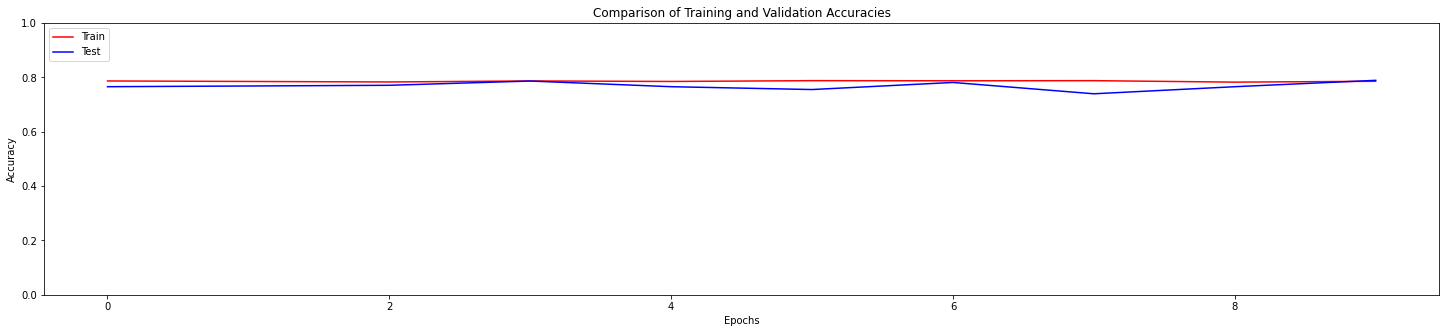

<Figure size 432x288 with 0 Axes>

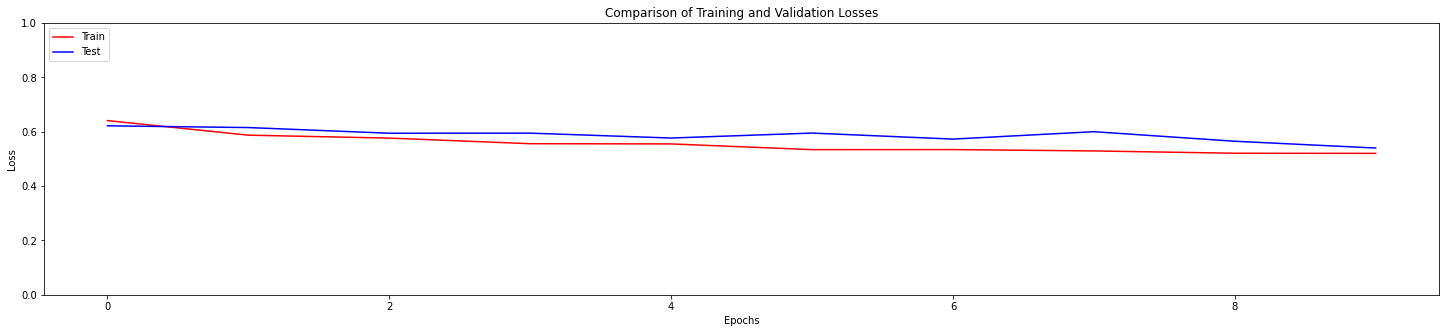

In [ ]:
acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

PlotAccuracyComparison(acc7, val_acc7, lab = 'Model 4 - No ImageDataGenerator')

PlotLossComparison(loss7, val_loss7, lab = 'Model 4 - No ImageDataGenerator')

### Decreasing learning rate

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history8 = model4.fit_generator(train_generator,
                        epochs = 10,
                        steps_per_epoch=13,
                        validation_data=test_generator,
                        validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
13/13 [==============================] - 553s 45s/step - loss: 2903.6294 - acc: 0.6422 - val_loss: 157.5917 - val_acc: 0.7760
Epoch 2/10
13/13 [==============================] - 495s 40s/step - loss: 198.2058 - acc: 0.7855 - val_loss: 226.4698 - val_acc: 0.7630
Epoch 3/10
13/13 [==============================] - 491s 40s/step - loss: 231.1125 - acc: 0.7855 - val_loss: 231.0188 - val_acc: 0.7734
Epoch 4/10
13/13 [==============================] - 489s 39s/step - loss: 225.7463 - acc: 0.7862 - val_loss: 218.2865 - val_acc: 0.7786
Epoch 5/10
13/13 [==============================] - 493s 39s/step - loss: 211.0823 - acc: 0.7862 - val_loss: 202.6743 - val_acc: 0.7630
Epoch 6/10
13/13 [==============================] - 479s 38s/step - loss: 195.6312 - acc: 0.7880 - val_loss: 187.6075 - val_acc: 0.7682
Epoch 7/10
13/13 [==============================] - 487s 39s/step - loss: 180.9713 - acc: 0.7849 - val_loss: 173.8388 - val_acc: 0.7812
Epoch 8/10
 3/13 [=====>.......................

It was very illegal my computer almost was set on fire

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history8 = model4.fit_generator(train_ds,
                        epochs = 10,
                        steps_per_epoch=5,
                        validation_data=validation_ds,
                        validation_steps = 3)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


5/5 [==============================] - 82s 16s/step - loss: 2316.4683 - acc: 0.3875 - val_loss: 1.2907 - val_acc: 0.7812
Epoch 2/10
5/5 [==============================] - 68s 16s/step - loss: 1.5246 - acc: 0.7937 - val_loss: 1.8971 - val_acc: 0.7500
Epoch 3/10
5/5 [==============================] - 63s 16s/step - loss: 2.0385 - acc: 0.8062 - val_loss: 2.3151 - val_acc: 0.7292
Epoch 4/10
5/5 [==============================] - 66s 16s/step - loss: 2.4281 - acc: 0.7750 - val_loss: 2.5556 - val_acc: 0.8646
Epoch 5/10
5/5 [==============================] - 66s 16s/step - loss: 2.7001 - acc: 0.7563 - val_loss: 2.7674 - val_acc: 0.7812
Epoch 6/10
5/5 [==============================] - 73s 18s/step - loss: 2.8049 - acc: 0.7937 - val_loss: 2.8484 - val_acc: 0.8021
Epoch 7/10
5/5 [==============================] - 63s 16s/step - loss: 2.9531 - acc: 0.7375 - val_loss: 2.9787 - val_acc: 0.7500
Epoch 8/10
5/5 [==============================] - 60s 15s/step - loss: 2.9605 - acc: 0.7750 - val_loss: 3

<Figure size 432x288 with 0 Axes>

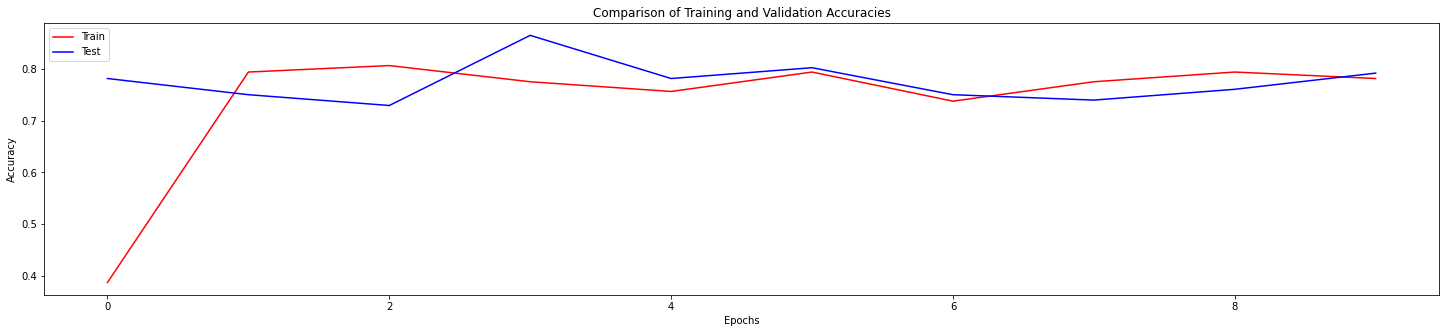

<Figure size 432x288 with 0 Axes>

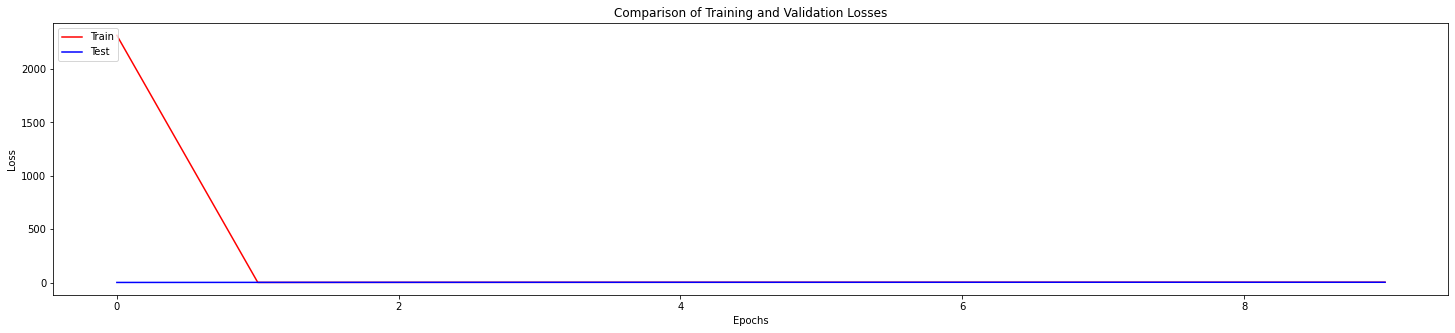

In [ ]:
acc8 = history8.history['acc']
val_acc8 = history8.history['val_acc']
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']

PlotAccuracyComparison(acc8, val_acc8, lab = 'Model 4 - No ImageDataGenerator, Smaller learning rate')

PlotLossComparison(loss8, val_loss8, lab = 'Model 4 - No ImageDataGenerator, Smaller learning rate')

### Third attempt

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/train/',
    labels='inferred',
    label_mode='binary',
    batch_size=64,
    image_size=(64, 64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/test/',
    labels='inferred',
    label_mode='binary',
    batch_size=64,
    image_size=(64, 64))

Found 1746 files belonging to 2 classes.
Found 510 files belonging to 2 classes.


In [ ]:
from keras import regularizers

img_rows, img_cols = 64, 64

model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))

model4.add(layers.Flatten())

model4.add(layers.Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 64)                1722432   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history9 = model4.fit_generator(train_ds,
                        epochs = 6,
                        steps_per_epoch=4,
                        validation_data=validation_ds,
                        validation_steps = 3)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


4/4 [==============================] - 119s 30s/step - loss: 1.2645 - acc: 0.7852 - val_loss: 1.1471 - val_acc: 0.7865
Epoch 2/6
4/4 [==============================] - 94s 31s/step - loss: 1.0729 - acc: 0.8008 - val_loss: 0.9583 - val_acc: 0.8177
Epoch 3/6
4/4 [==============================] - 94s 30s/step - loss: 0.9268 - acc: 0.7969 - val_loss: 0.8653 - val_acc: 0.7812
Epoch 4/6
4/4 [==============================] - 92s 30s/step - loss: 0.8219 - acc: 0.7852 - val_loss: 0.7820 - val_acc: 0.7656
Epoch 5/6
4/4 [==============================] - 88s 29s/step - loss: 0.7441 - acc: 0.7734 - val_loss: 0.7313 - val_acc: 0.7448
Epoch 6/6
4/4 [==============================] - 80s 27s/step - loss: 0.6597 - acc: 0.7969 - val_loss: 0.6369 - val_acc: 0.7865


<Figure size 432x288 with 0 Axes>

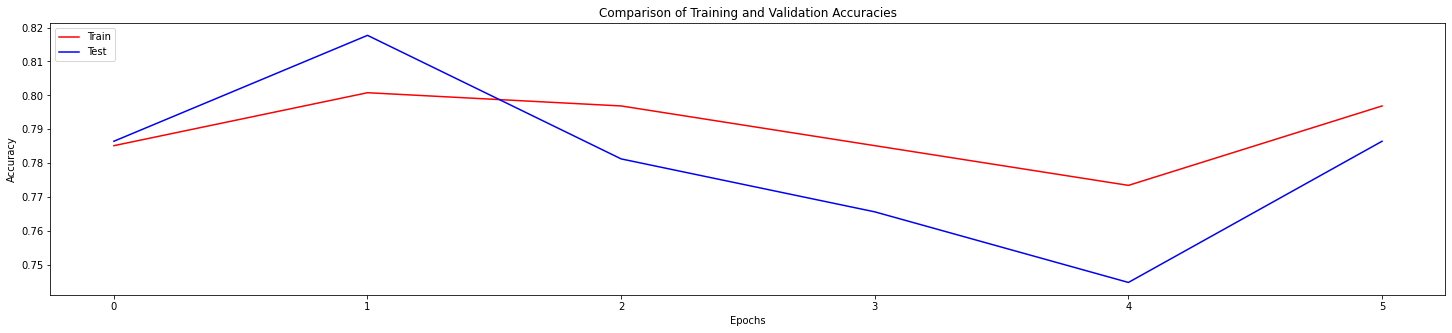

<Figure size 432x288 with 0 Axes>

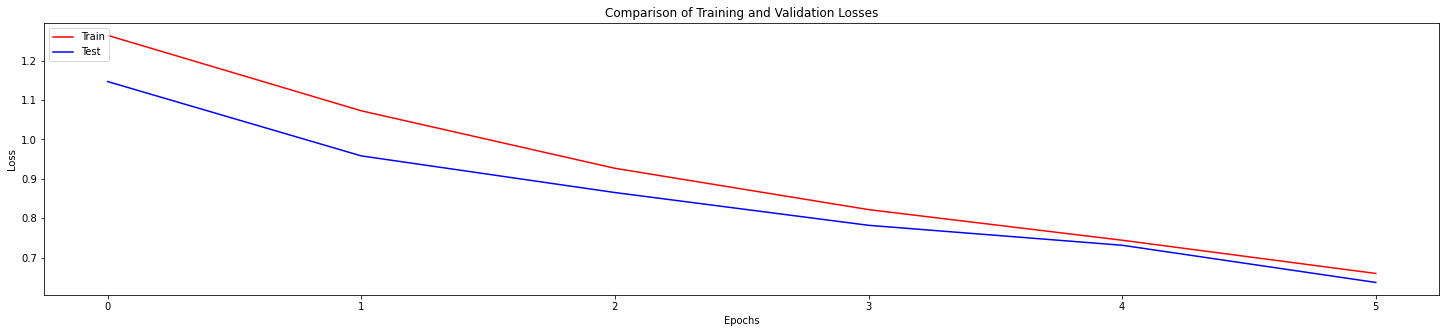

In [ ]:
acc9 = history9.history['acc']
val_acc9 = history9.history['val_acc']
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']

PlotAccuracyComparison(acc9, val_acc9, lab = 'Model 4 - No ImageDataGenerator, bigger learning rate')

PlotLossComparison(loss9, val_loss9, lab = 'Model 4 - No ImageDataGenerator, bigger learning rate')

## Model 5

Adding dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/train/',
    labels='inferred',
    label_mode='binary',
    batch_size=64,
    image_size=(64, 64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/test/',
    labels='inferred',
    label_mode='binary',
    batch_size=64,
    image_size=(64, 64))

In [ ]:
from keras import regularizers
from tensorflow import keras
from keras import layers

img_rows, img_cols = 64, 64

model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(32, (3, 3), activation='relu'))

model5.add(layers.Flatten())
model5.add(layers.Dropout(rate = 0.2))

model5.add(layers.Dense(activation = 'relu', units = 64, kernel_regularizer=regularizers.l2(0.001)))
model5.add(layers.Dense(activation = 'relu', units = 32, kernel_regularizer=regularizers.l2(0.001)))
model5.add(layers.Dense(16, activation='relu'))
model5.add(layers.Dense(1, activation='sigmoid'))

model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 26912)             0         
                                                                 
 dropout (Dropout)           (None, 26912)             0         
                                                                 
 dense (Dense)               (None, 64)                1722432   
                                                        

In [ ]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history10 = model5.fit_generator(train_ds,
                        epochs = 6,
                        steps_per_epoch=4,
                        validation_data=validation_ds,
                        validation_steps = 3)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


4/4 [==============================] - 70s 16s/step - loss: 1.0352 - acc: 0.7734 - val_loss: 0.7489 - val_acc: 0.6562
Epoch 2/6
4/4 [==============================] - 45s 15s/step - loss: 0.7324 - acc: 0.7656 - val_loss: 0.6166 - val_acc: 0.7917
Epoch 3/6
4/4 [==============================] - 43s 14s/step - loss: 0.5702 - acc: 0.8438 - val_loss: 0.6948 - val_acc: 0.7396
Epoch 4/6
4/4 [==============================] - 43s 14s/step - loss: 0.6772 - acc: 0.7422 - val_loss: 0.6542 - val_acc: 0.7396
Epoch 5/6
4/4 [==============================] - 43s 14s/step - loss: 0.6699 - acc: 0.7812 - val_loss: 0.5912 - val_acc: 0.7604
Epoch 6/6
4/4 [==============================] - 43s 14s/step - loss: 0.5660 - acc: 0.7969 - val_loss: 0.5994 - val_acc: 0.8125


<Figure size 432x288 with 0 Axes>

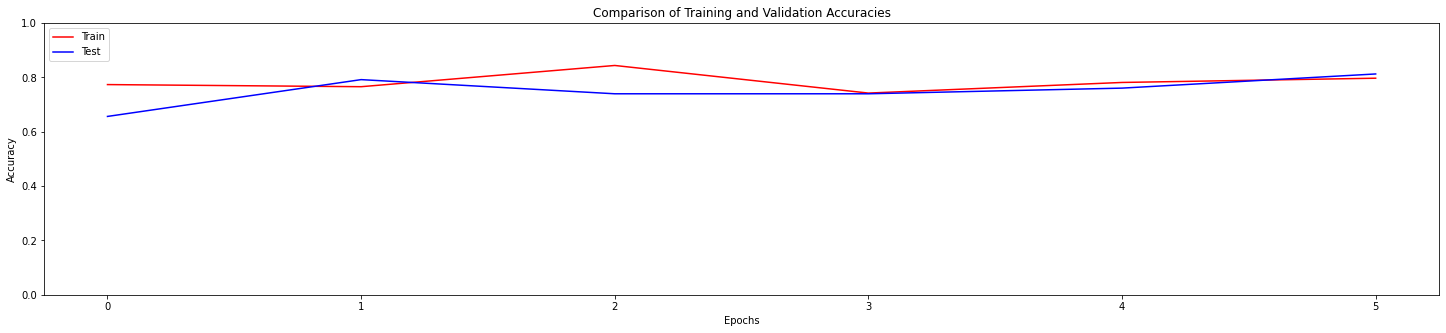

<Figure size 432x288 with 0 Axes>

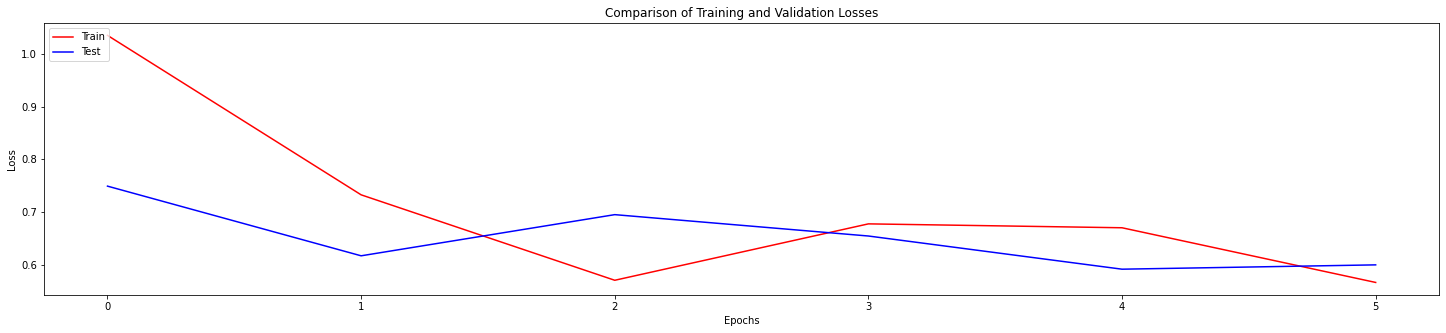

In [ ]:
acc10 = history10.history['acc']
val_acc10 = history10.history['val_acc']
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']

PlotAccuracyComparison(acc10, val_acc10, lab = 'Model 5 - No ImageDataGenerator, bigger learning rate')

PlotLossComparison(loss10, val_loss10, lab = 'Model 5 - No ImageDataGenerator, bigger learning rate')

### Smaller batch

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/train/',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(64, 64))
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/skin-lesions/test/',
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(64, 64))

Found 1746 files belonging to 2 classes.
Found 510 files belonging to 2 classes.


In [ ]:
model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['acc'])

history11 = model5.fit_generator(train_ds,
                        epochs = 6,
                        steps_per_epoch=8,
                        validation_data=validation_ds,
                        validation_steps = 3)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


8/8 [==============================] - 84s 10s/step - loss: 23.4923 - acc: 0.6055 - val_loss: 1.7127 - val_acc: 0.7396
Epoch 2/6
8/8 [==============================] - 50s 7s/step - loss: 0.7706 - acc: 0.7773 - val_loss: 0.6882 - val_acc: 0.7708
Epoch 3/6
8/8 [==============================] - 51s 7s/step - loss: 0.7496 - acc: 0.7305 - val_loss: 0.8135 - val_acc: 0.6875
Epoch 4/6
8/8 [==============================] - 50s 7s/step - loss: 0.7991 - acc: 0.7188 - val_loss: 0.7379 - val_acc: 0.7812
Epoch 5/6
8/8 [==============================] - 50s 7s/step - loss: 0.6343 - acc: 0.8398 - val_loss: 0.9124 - val_acc: 0.7292
Epoch 6/6
8/8 [==============================] - 42s 6s/step - loss: 0.6488 - acc: 0.7969 - val_loss: 0.7398 - val_acc: 0.7396


<Figure size 432x288 with 0 Axes>

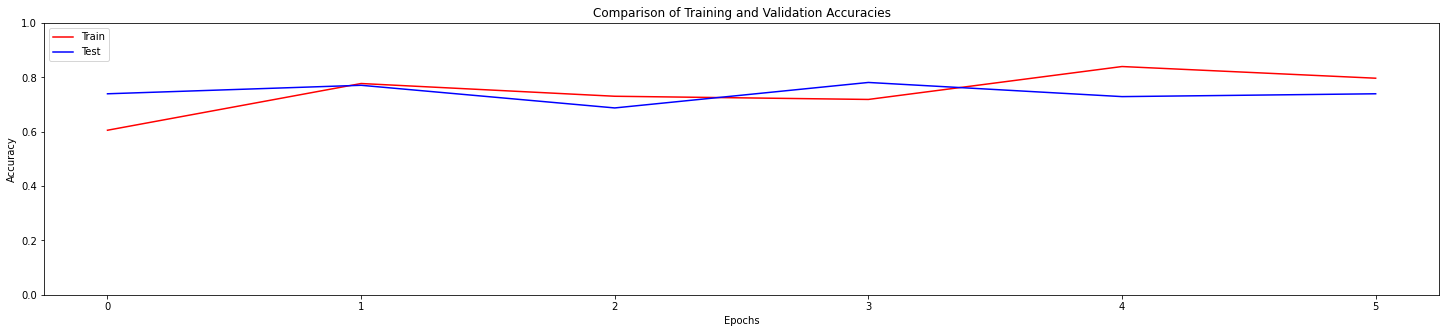

<Figure size 432x288 with 0 Axes>

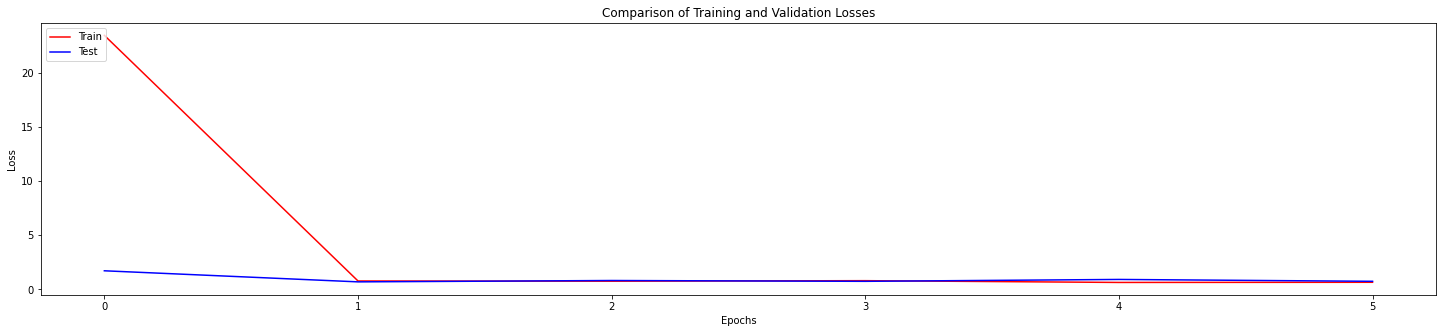

In [ ]:
acc11 = history11.history['acc']
val_acc11 = history11.history['val_acc']
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']

PlotAccuracyComparison(acc11, val_acc11, lab = 'Model 5 - No ImageDataGenerator, bigger learning rate')

PlotLossComparison(loss11, val_loss11, lab = 'Model 5 - No ImageDataGenerator, bigger learning rate')